# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os
import chart_studio.plotly
import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

ModuleNotFoundError: No module named 'chart_studio'

In [2]:
import pandas
data = pandas.read_csv('preprocessed_data.csv')

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [3]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
y=data['project_is_approved']
x=data.drop(['project_is_approved'],axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train)

print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

(61452, 8) (61452,)
(20484, 8) (20484,)
(27312, 8) (27312,)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [4]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
vectorizer1 = CountVectorizer(min_df=10,ngram_range=(1,4))
vectorizer1.fit(X_train['essay'].values) # fit has to happen only on train data


X_train_essay_bow = vectorizer1.transform(X_train['essay'].values)
X_cv_essay_bow = vectorizer1.transform(X_cv['essay'].values)
X_test_essay_bow = vectorizer1.transform(X_test['essay'].values)

print("After BOW vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_cv_essay_bow.shape, y_cv.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

###############################################################################
#fitting tfidf vectorizer for set 2
vectorizer_tfidf1 = TfidfVectorizer(min_df=10,ngram_range=(1,4))
vectorizer_tfidf1.fit(X_train['essay'].values) 


X_train_essay_tfidf = vectorizer_tfidf1.transform(X_train['essay'].values)
X_cv_essay_tfidf = vectorizer_tfidf1.transform(X_cv['essay'].values)
X_test_essay_tfidf = vectorizer_tfidf1.transform(X_test['essay'].values)

print("After TFIDF vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_cv_essay_tfidf.shape, y_cv.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After BOW vectorizations
(61452, 211837) (61452,)
(20484, 211837) (20484,)
(27312, 211837) (27312,)
After TFIDF vectorizations
(61452, 211837) (61452,)
(20484, 211837) (20484,)
(27312, 211837) (27312,)


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [34]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
vectorizer2 = CountVectorizer()
vectorizer2.fit(X_train['school_state'].values) 


X_train_state_ohe_bow = vectorizer2.transform(X_train['school_state'].values)
X_cv_state_ohe_bow = vectorizer2.transform(X_cv['school_state'].values)
X_test_state_ohe_bow = vectorizer2.transform(X_test['school_state'].values)

print("After BOW vectorizations")
print(X_train_state_ohe_bow.shape, y_train.shape)
print(X_cv_state_ohe_bow.shape, y_cv.shape)
print(X_test_state_ohe_bow.shape, y_test.shape)
print(vectorizer2.get_feature_names())
print("="*100)

###############################################################################
#fitting tfidf vectorizer for set 2

vectorizer_tfidf2 = TfidfVectorizer()
vectorizer_tfidf2.fit(X_train['school_state'].values)

X_train_state_ohe_tfidf = vectorizer_tfidf2.transform(X_train['school_state'].values)
X_cv_state_ohe_tfidf = vectorizer_tfidf2.transform(X_cv['school_state'].values)
X_test_state_ohe_tfidf = vectorizer_tfidf2.transform(X_test['school_state'].values)

print("After TFIDF vectorizations")
print(X_train_state_ohe_tfidf.shape, y_train.shape)
print(X_cv_state_ohe_tfidf.shape, y_cv.shape)
print(X_test_state_ohe_tfidf.shape, y_test.shape)
print(vectorizer_tfidf2.get_feature_names())
print("="*100)
z2=X_train_essay_bow.shape[1]+X_train_state_ohe_bow.shape[1]

After BOW vectorizations
(61452, 51) (61452,)
(20484, 51) (20484,)
(27312, 51) (27312,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
After TFIDF vectorizations
(61452, 51) (61452,)
(20484, 51) (20484,)
(27312, 51) (27312,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


# encoding teacher prefix both in bow and tfidf

In [35]:
vectorizer3 = CountVectorizer()
vectorizer3.fit(X_train['teacher_prefix'].values) 


X_train_teacher_ohe_bow = vectorizer3.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe_bow = vectorizer3.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe_bow = vectorizer3.transform(X_test['teacher_prefix'].values)

print("After BOW vectorizations")
print(X_train_teacher_ohe_bow.shape, y_train.shape)
print(X_cv_teacher_ohe_bow.shape, y_cv.shape)
print(X_test_teacher_ohe_bow.shape, y_test.shape)
print(vectorizer3.get_feature_names())
print("="*100)


###############################################################################
#fitting tfidf vectorizer for set 2

vectorizer_tfidf3 = TfidfVectorizer()
vectorizer_tfidf3.fit(X_train['teacher_prefix'].values) 


X_train_teacher_ohe_tfidf = vectorizer_tfidf3.transform(X_train['teacher_prefix'].values)
X_cv_teacher_ohe_tfidf = vectorizer_tfidf3.transform(X_cv['teacher_prefix'].values)
X_test_teacher_ohe_tfidf = vectorizer_tfidf3.transform(X_test['teacher_prefix'].values)

print("After TFIDF vectorizations")
print(X_train_teacher_ohe_tfidf.shape, y_train.shape)
print(X_cv_teacher_ohe_tfidf.shape, y_cv.shape)
print(X_test_teacher_ohe_tfidf.shape, y_test.shape)
print(vectorizer_tfidf3.get_feature_names())
print("="*100)
z3=z2+X_train_teacher_ohe_bow.shape[1]

After BOW vectorizations
(61452, 5) (61452,)
(20484, 5) (20484,)
(27312, 5) (27312,)
['dr', 'mr', 'mrs', 'ms', 'teacher']
After TFIDF vectorizations
(61452, 5) (61452,)
(20484, 5) (20484,)
(27312, 5) (27312,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


# encoding project_grade_category

In [36]:
vectorizer4 = CountVectorizer()
vectorizer4.fit(X_train['project_grade_category'].values) 


X_train_grade_ohe_bow = vectorizer4.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe_bow = vectorizer4.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe_bow = vectorizer4.transform(X_test['project_grade_category'].values)

print("After BOW vectorizations")
print(X_train_grade_ohe_bow.shape, y_train.shape)
print(X_cv_grade_ohe_bow.shape, y_cv.shape)
print(X_test_grade_ohe_bow.shape, y_test.shape)
print(vectorizer4.get_feature_names())
print("="*100)

###############################################################################
#fitting tfidf vectorizer for set 2

vectorizer_tfidf4 = TfidfVectorizer()
vectorizer_tfidf4.fit(X_train['project_grade_category'].values) 


X_train_grade_ohe_tfidf = vectorizer_tfidf4.transform(X_train['project_grade_category'].values)
X_cv_grade_ohe_tfidf = vectorizer_tfidf4.transform(X_cv['project_grade_category'].values)
X_test_grade_ohe_tfidf = vectorizer_tfidf4.transform(X_test['project_grade_category'].values)

print("After TFIDF vectorizations")
print(X_train_grade_ohe_tfidf.shape, y_train.shape)
print(X_cv_grade_ohe_tfidf.shape, y_cv.shape)
print(X_test_grade_ohe_tfidf.shape, y_test.shape)
print(vectorizer_tfidf4.get_feature_names())
print("="*100)
z4=z3+X_train_grade_ohe_bow.shape[1]

After BOW vectorizations
(61452, 4) (61452,)
(20484, 4) (20484,)
(27312, 4) (27312,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
After TFIDF vectorizations
(61452, 4) (61452,)
(20484, 4) (20484,)
(27312, 4) (27312,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


# encoding clean categories

In [37]:
vectorizer5 = CountVectorizer()
vectorizer5.fit(X_train['clean_categories'].values) 


X_train_clean_categories_ohe_bow = vectorizer5.transform(X_train['clean_categories'].values)
X_cv_clean_categories_ohe_bow = vectorizer5.transform(X_cv['clean_categories'].values)
X_test_clean_categories_ohe_bow = vectorizer5.transform(X_test['clean_categories'].values)

print("After BOW vectorizations")
print(X_train_clean_categories_ohe_bow.shape, y_train.shape)
print(X_cv_clean_categories_ohe_bow.shape, y_cv.shape)
print(X_test_clean_categories_ohe_bow.shape, y_test.shape)
print(vectorizer5.get_feature_names())
print("="*100)

###############################################################################
#fitting tfidf vectorizer for set 2

vectorizer_tfidf5 = TfidfVectorizer()
vectorizer_tfidf5.fit(X_train['clean_categories'].values) 


X_train_clean_categories_ohe_tfidf = vectorizer_tfidf5.transform(X_train['clean_categories'].values)
X_cv_clean_categories_ohe_tfidf = vectorizer_tfidf5.transform(X_cv['clean_categories'].values)
X_test_clean_categories_ohe_tfidf = vectorizer_tfidf5.transform(X_test['clean_categories'].values)

print("After TFIDF vectorizations")
print(X_train_clean_categories_ohe_tfidf.shape, y_train.shape)
print(X_cv_clean_categories_ohe_tfidf.shape, y_cv.shape)
print(X_test_clean_categories_ohe_tfidf.shape, y_test.shape)
print(vectorizer_tfidf5.get_feature_names())
print("="*100)
z5=z4+X_train_clean_categories_ohe_bow.shape[1]

After BOW vectorizations
(61452, 9) (61452,)
(20484, 9) (20484,)
(27312, 9) (27312,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
After TFIDF vectorizations
(61452, 9) (61452,)
(20484, 9) (20484,)
(27312, 9) (27312,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


# encoding clean_subcategories

In [38]:
vectorizer6 = CountVectorizer()
vectorizer6.fit(X_train['clean_subcategories'].values) 


X_train_clean_subcategories_ohe_bow = vectorizer6.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories_ohe_bow = vectorizer6.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_ohe_bow = vectorizer6.transform(X_test['clean_subcategories'].values)

print("After BOW vectorizations")
print(X_train_clean_subcategories_ohe_bow.shape, y_train.shape)
print(X_cv_clean_subcategories_ohe_bow.shape, y_cv.shape)
print(X_test_clean_subcategories_ohe_bow.shape, y_test.shape)
print(vectorizer6.get_feature_names())
print("="*100)

###############################################################################
#fitting tfidf vectorizer for set 2

vectorizer_tfidf6 = TfidfVectorizer()
vectorizer_tfidf6.fit(X_train['clean_subcategories'].values) 


X_train_clean_subcategories_ohe_tfidf = vectorizer_tfidf6.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories_ohe_tfidf = vectorizer_tfidf6.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_ohe_tfidf = vectorizer_tfidf6.transform(X_test['clean_subcategories'].values)

print("After TFIDF vectorizations")
print(X_train_clean_subcategories_ohe_tfidf.shape, y_train.shape)
print(X_cv_clean_subcategories_ohe_tfidf.shape, y_cv.shape)
print(X_test_clean_subcategories_ohe_tfidf.shape, y_test.shape)
print(vectorizer_tfidf6.get_feature_names())
print("="*100)
z6=z5+X_train_clean_subcategories_ohe_bow.shape[1]

After BOW vectorizations
(61452, 30) (61452,)
(20484, 30) (20484,)
(27312, 30) (27312,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
After TFIDF vectorizations
(61452, 30) (61452,)
(20484, 30) (20484,)
(27312, 30) (27312,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', '

# Normalizing price

In [10]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm_bow = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm_bow = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm_bow = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After BOW vectorizations")
print(X_train_price_norm_bow.shape, y_train.shape)
print(X_cv_price_norm_bow.shape, y_cv.shape)
print(X_test_price_norm_bow.shape, y_test.shape)
print("="*100)

###############################################################################
#fitting normalizer for encoding of numerical values for set 2

X_train_price_norm_tfidf = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm_tfidf = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm_tfidf = normalizer.transform(X_test['price'].values.reshape(-1,1))



print("After TFIDF vectorizations")
print(X_train_price_norm_tfidf.shape, y_train.shape)
print(X_cv_price_norm_tfidf.shape, y_cv.shape)
print(X_test_price_norm_tfidf.shape, y_test.shape)
print("="*100)

After BOW vectorizations
(61452, 1) (61452,)
(20484, 1) (20484,)
(27312, 1) (27312,)
After TFIDF vectorizations
(61452, 1) (61452,)
(20484, 1) (20484,)
(27312, 1) (27312,)


# Normalizing teacher_number_of_previously_posted_projects

In [11]:
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_teacher_posted_projects_norm_bow = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_teacher_posted_projects_norm_bow = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_posted_projects_norm_bow = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After BOW vectorizations")
print(X_train_teacher_posted_projects_norm_bow.shape, y_train.shape)
print(X_cv_teacher_posted_projects_norm_bow.shape, y_cv.shape)
print(X_test_teacher_posted_projects_norm_bow.shape, y_test.shape)
print("="*100)

###############################################################################
#fitting normalizer for encoding of numerical values for set 2

X_train_teacher_posted_projects_norm_tfidf = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_teacher_posted_projects_norm_tfidf = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_posted_projects_norm_tfidf = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))



print("After TFIDF vectorizations")
print(X_train_teacher_posted_projects_norm_tfidf.shape, y_train.shape)
print(X_cv_teacher_posted_projects_norm_tfidf.shape, y_cv.shape)
print(X_test_teacher_posted_projects_norm_tfidf.shape, y_test.shape)
print("="*100)

After BOW vectorizations
(61452, 1) (61452,)
(20484, 1) (20484,)
(27312, 1) (27312,)
After TFIDF vectorizations
(61452, 1) (61452,)
(20484, 1) (20484,)
(27312, 1) (27312,)


# Concatinating all the features

In [12]:
from scipy.sparse import hstack
X_tr_bow = hstack((X_train_essay_bow, X_train_state_ohe_bow, X_train_teacher_ohe_bow, X_train_grade_ohe_bow, X_train_price_norm_bow,X_train_clean_subcategories_ohe_bow,X_train_clean_categories_ohe_bow,X_train_teacher_posted_projects_norm_bow)).tocsr()
X_cr_bow = hstack((X_cv_essay_bow, X_cv_state_ohe_bow, X_cv_teacher_ohe_bow, X_cv_grade_ohe_bow, X_cv_price_norm_bow,X_cv_clean_subcategories_ohe_bow,X_cv_clean_categories_ohe_bow,X_cv_teacher_posted_projects_norm_bow)).tocsr()
X_te_bow = hstack((X_test_essay_bow, X_test_state_ohe_bow, X_test_teacher_ohe_bow, X_test_grade_ohe_bow, X_test_price_norm_bow,X_test_clean_subcategories_ohe_bow,X_test_clean_categories_ohe_bow,X_test_teacher_posted_projects_norm_bow)).tocsr()

print("Final Data matrix AFTER BOW VECTORIZATION")
print(X_tr_bow.shape, y_train.shape)
print(X_cr_bow.shape, y_cv.shape)
print(X_te_bow.shape, y_test.shape)
print("="*100)


X_tr_tfidf = hstack((X_train_essay_tfidf, X_train_state_ohe_tfidf, X_train_teacher_ohe_tfidf, X_train_grade_ohe_tfidf, X_train_price_norm_tfidf,X_train_clean_subcategories_ohe_tfidf,X_train_clean_categories_ohe_tfidf,X_train_teacher_posted_projects_norm_tfidf)).tocsr()
X_cr_tfidf = hstack((X_cv_essay_tfidf, X_cv_state_ohe_tfidf, X_cv_teacher_ohe_tfidf, X_cv_grade_ohe_tfidf, X_cv_price_norm_tfidf,X_cv_clean_subcategories_ohe_tfidf,X_cv_clean_categories_ohe_tfidf,X_cv_teacher_posted_projects_norm_tfidf)).tocsr()
X_te_tfidf = hstack((X_test_essay_tfidf, X_test_state_ohe_tfidf, X_test_teacher_ohe_tfidf, X_test_grade_ohe_tfidf, X_test_price_norm_tfidf,X_test_clean_subcategories_ohe_tfidf,X_test_clean_categories_ohe_tfidf,X_test_teacher_posted_projects_norm_tfidf)).tocsr()

print("Final Data matrix AFTER TFIDF VECTORIZATION")
print(X_tr_tfidf.shape, y_train.shape)
print(X_cr_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print("="*100)

Final Data matrix AFTER BOW VECTORIZATION
(61452, 211938) (61452,)
(20484, 211938) (20484,)
(27312, 211938) (27312,)
Final Data matrix AFTER TFIDF VECTORIZATION
(61452, 211938) (61452,)
(20484, 211938) (20484,)
(27312, 211938) (27312,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

# Applying Random search for bow for alpha

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.477222      0.067994         0.054909        0.010341           5   
1       0.540680      0.053800         0.059434        0.014907           1   

         params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 5}           0.664095           0.657730           0.654857   
1  {'alpha': 1}           0.710510           0.684726           0.693267   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0           0.650780  ...            0.838087            0.836030   
1           0.688119  ...            0.931330            0.932803   

   split4_train_score  split5_train_score  split6_train_score  \
0            0.838059            0.838163            0.836980   
1            0.931208            0.932310            0.931828   

   split7_train_score  split8_train_score  split9_train_score  \
0            0.837213            0.837601            0.838937   

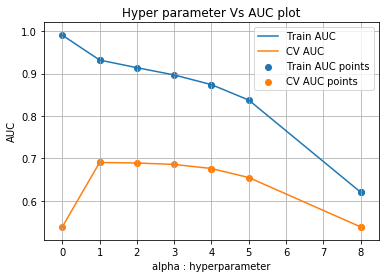

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
6,0.531798,0.061279,0.053621,0.007774,0,{'alpha': 0},0.536683,0.539935,0.538537,0.543898,...,0.990812,0.990494,0.990184,0.990697,0.990725,0.990581,0.990050,0.990707,0.990419,0.000362
1,0.540680,0.053800,0.059434,0.014907,1,{'alpha': 1},0.710510,0.684726,0.693267,0.688119,...,0.931330,0.932803,0.931208,0.932310,0.931828,0.931569,0.931790,0.931362,0.931743,0.000743
8,0.543469,0.117130,0.056776,0.010710,1,{'alpha': 1},0.710510,0.684726,0.693267,0.688119,...,0.931330,0.932803,0.931208,0.932310,0.931828,0.931569,0.931790,0.931362,0.931743,0.000743
3,0.594516,0.060338,0.058502,0.006518,2,{'alpha': 2},0.708384,0.686159,0.691030,0.686843,...,0.913396,0.915034,0.913021,0.914292,0.913555,0.913800,0.913867,0.913393,0.913724,0.000848
4,0.612267,0.080684,0.059721,0.007691,3,{'alpha': 3},0.703144,0.682319,0.687747,0.684799,...,0.896403,0.897627,0.895913,0.897491,0.896201,0.896670,0.897077,0.896570,0.896596,0.000810


In [13]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

nb = MultinomialNB()
parameters = {'alpha':sp_randint(0.01, 10)}

clf = RandomizedSearchCV(nb, parameters, cv=10, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr_bow, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
print(results.head(2))
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

plt.plot(alpha, train_auc, label='Train AUC')


plt.plot(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

# Applying Random search for tfidf for alpha

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.840894      0.848011         0.075070        0.024857           9   
1       0.603151      0.083315         0.058772        0.010634           5   

         params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 9}           0.588536           0.601645           0.587072   
1  {'alpha': 5}           0.599554           0.610647           0.596767   

   split3_test_score  ...  split2_train_score  split3_train_score  \
0           0.582908  ...            0.619117            0.619703   
1           0.590438  ...            0.649191            0.649813   

   split4_train_score  split5_train_score  split6_train_score  \
0            0.619253            0.620251            0.621093   
1            0.649375            0.650255            0.650930   

   split7_train_score  split8_train_score  split9_train_score  \
0            0.619262            0.621284            0.618917   

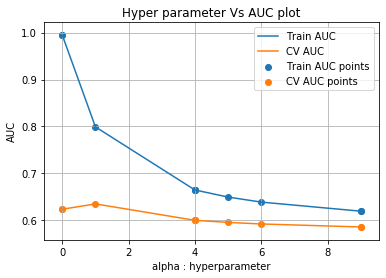

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
3,0.597187,0.068562,0.059167,0.005195,0,{'alpha': 0},0.638609,0.615254,0.626446,0.633339,...,0.994436,0.994675,0.994438,0.994613,0.994529,0.994561,0.994326,0.994804,0.994528,0.000136
6,0.555313,0.050235,0.061300,0.008257,0,{'alpha': 0},0.638609,0.615254,0.626446,0.633339,...,0.994436,0.994675,0.994438,0.994613,0.994529,0.994561,0.994326,0.994804,0.994528,0.000136
2,0.549250,0.079276,0.058154,0.005428,1,{'alpha': 1},0.646849,0.645581,0.636913,0.625986,...,0.799092,0.798538,0.799302,0.799298,0.799509,0.799452,0.799410,0.799273,0.799094,0.000408
4,0.638242,0.102916,0.062503,0.006701,4,{'alpha': 4},0.604605,0.614725,0.601331,0.594006,...,0.664317,0.664933,0.664546,0.665328,0.665941,0.664666,0.666290,0.664165,0.664768,0.000836
5,0.628369,0.090979,0.066217,0.014279,4,{'alpha': 4},0.604605,0.614725,0.601331,0.594006,...,0.664317,0.664933,0.664546,0.665328,0.665941,0.664666,0.666290,0.664165,0.664768,0.000836


In [14]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

nb = MultinomialNB()
parameters = {'alpha':sp_randint(0.01, 10)}

clf = RandomizedSearchCV(nb, parameters, cv=10, scoring='roc_auc',return_train_score=True)
clf.fit(X_tr_tfidf, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
print(results.head(2))
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

plt.plot(alpha, train_auc, label='Train AUC')

plt.plot(alpha, cv_auc, label='CV AUC')


plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [48]:
best_alpha_bow=2
best_alpha_tfidf=1

In [30]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

# Testing the performance of the model on test data, plotting ROC Curves for bow

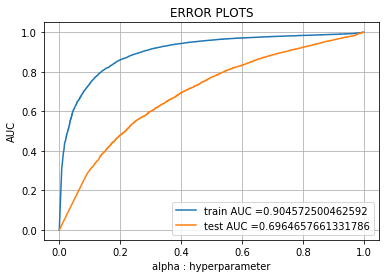

In [31]:
from sklearn.metrics import roc_curve, auc


nb = MultinomialNB(alpha=best_alpha_bow)
nb.fit(X_tr_bow, y_train)


y_train_pred = batch_predict(nb, X_tr_bow)    
y_test_pred = batch_predict(nb, X_te_bow)

train_fpr_bow, train_tpr_bow, tr_thresholds_bow = roc_curve(y_train, y_train_pred)
test_fpr_bow, test_tpr_bow, te_thresholds_bow = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr_bow, train_tpr_bow, label="train AUC ="+str(auc(train_fpr_bow, train_tpr_bow)))
plt.plot(test_fpr_bow, test_tpr_bow, label="test AUC ="+str(auc(test_fpr_bow, test_tpr_bow)))
plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# Testing the performance of the model on test data, plotting ROC Curve for tfidf 

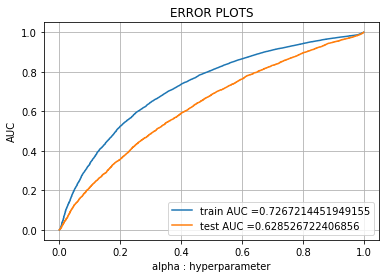

In [32]:
from sklearn.metrics import roc_curve, auc


nb1 = MultinomialNB(alpha=best_alpha_tfidf)
nb1.fit(X_tr_tfidf, y_train)


y_train_pred = batch_predict(nb1, X_tr_tfidf)    
y_test_pred = batch_predict(nb1, X_te_tfidf)

train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train, y_train_pred)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf= roc_curve(y_test, y_test_pred)

plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="train AUC ="+str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="test AUC ="+str(auc(test_fpr_tfidf, test_tpr_tfidf)))
plt.legend()
plt.xlabel("alpha : hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# printing Confusion Matrix for BOW

In [19]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds_bow, train_fpr_bow, train_tpr_bow)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.7286342404491284 for threshold 0.853
Train confusion matrix
[[   72  9233]
 [  238 51909]]
Test confusion matrix
[[   15  4120]
 [  105 23072]]


# printing Confusion Matrix for tfidf

In [28]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds_tfidf, train_fpr_tfidf, train_tpr_tfidf)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.5351730244411884 for threshold 0.998
Train confusion matrix
[[ 8540   765]
 [12351 39796]]
Test confusion matrix
[[ 2411  1724]
 [ 6752 16425]]


# Printing top 20 features of BOW

In [41]:
z1=X_train_essay_bow.shape[1]
a=np.argsort(nb.feature_log_prob_[0])
b=a[::-1]
l=[]
for i in range(20):
    l.append(b[i])
for i in l:
    if i<=z1:
        print(i,vectorizer1.get_feature_names()[i])
    elif i>z1 and i<=z2:
        print(i,vectorizer2.get_feature_names()[i])
    elif i>z2 and i<=z3:
        print(i,vectorizer3.get_feature_names()[i])
    elif i>z3 and i<z4:
        print(i,vectorizer4.get_feature_names()[i])
    elif i>z4 and i<=z5:
        print(i,vectorizer5.get_feature_names()[i])
    elif i>z5 and i<=z6:
        print(i,vectorizer6.get_feature_names()[i])

165008 students
147602 school
93921 learning
113599 my
29019 classroom
120381 not
91395 learn
185946 they
75160 help
182680 the
114431 my students
116113 nannan
105622 many
201384 we
116477 need
206185 work
32349 come
101509 love


#  Printing top 20 features for tfidf

In [47]:
z1=X_train_essay_bow.shape[1]
print(z1,z2,z3,z4,z5,z6)
a=np.argsort(nb1.feature_log_prob_[0])
b=a[::-1]
l=[]
for i in range(20):
    l.append(b[i])
print(l)
for i in l:
    if i<=z1:
        print(vectorizer_tfidf1.get_feature_names()[i])
    elif i>z1 and i<=z2:
        print(vectorizer_tfidf2.get_feature_names()[i-z1-1])
    elif i>z2 and i<=z3:
        print(vectorizer_tfidf3.get_feature_names()[i-z2-1])
    elif i>z3 and i<=z4:
        print(vectorizer_tfidf4.get_feature_names()[i-z3-1])
    elif i>z4 and i<=z5:
        print(vectorizer_tfidf5.get_feature_names()[i-z4-1])
    elif i>z5 and i<=z6:
        print(vectorizer_tfidf6.get_feature_names()[i-z5-1])
    

211837 211888 211893 211897 211906 211936
[211897, 211937, 211890, 211896, 211891, 211933, 211893, 211932, 211917, 211915, 211894, 211916, 211841, 211930, 211935, 211928, 211924, 211895, 211889, 211898]
grades_prek_2
mr
grades_9_12
mrs
specialneeds
teacher
socialsciences
extracurricular
environmentalscience
grades_3_5
esl
az
parentinvolvement
visualarts
nutritioneducation
literacy
grades_6_8
dr
appliedlearning


# Printing Table as summary

In [52]:
from prettytable import PrettyTable

x=PrettyTable()
x.field_names=['Vectorizer','Model','Hyper Parameter',"AUC"]
x.add_row(["BOW","MultinomialNB",best_alpha_bow,auc(test_fpr_bow, test_tpr_bow)])
x.add_row(["TFIDF","MultinomialNB",best_alpha_tfidf,auc(test_fpr_tfidf, test_tpr_tfidf)])
print(x)

+------------+---------------+-----------------+--------------------+
| Vectorizer |     Model     | Hyper Parameter |        AUC         |
+------------+---------------+-----------------+--------------------+
|    BOW     | MultinomialNB |        2        | 0.6964657661331786 |
|   TFIDF    | MultinomialNB |        1        | 0.628526722406856  |
+------------+---------------+-----------------+--------------------+
